# **Welcome to the Notebook**

### Let's mount the google drive 

# Task 1 : 
Installing pyspark module

In [ ]:
!pip install pyspark

Installing google.colab module

In [ ]:
!pip install google.colab

     |████████████████████████████████| 81kB 3.6MB/s 
     |████████████████████████████████| 71kB 3.6MB/s 
     |████████████████████████████████| 112kB 7.5MB/s 
     |████████████████████████████████| 8.0MB 6.4MB/s 
     |████████████████████████████████| 10.1MB 30.9MB/s 
     |████████████████████████████████| 61kB 4.9MB/s 
     |████████████████████████████████| 491kB 37.6MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
  Created wheel for google.colab: filename=google_colab-1.0.0-py2.py3-none-any.whl size=102289 sha256=91adbdcd8e7a2ec4a9accbb114f3e4e92a5e7b71d16e845286c6dfd446fec410
  Stored in directory: /root/.cache/pip/wheels/38/0d/59/701e300a337b2a2e07b27fe74dbfff0bc56ac58f711566ee67
  Created wheel for portpicker: filename=portpicker-1.2.0-cp37-none-any.whl size=13367 sha256=f686f0d6e43205511538274b148c839751264e30f493acec1a1cd08239258686
  Stored in directory: /root/.cache/pip/wheels/4a/45/47/1e126be9d4605e71f00d6e6fb151611f2f4cb9770b050c7d2d
  Created wheel for t

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the modules 

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, struct 
import matplotlib.pyplot as plts

creating spark session

In [ ]:
spark = SparkSession.builder.appName('spark_app').getOrCreate()

# Task 2 : 
importing the *Listenings.csv* file: 

In [ ]:
listening_csv_path = '/content/drive/MyDrive/Learning/coursera/Data analysis using PySpark/dataset/listenings.csv'
listening_df = spark.read.format('csv').option('inferSchema', True).option('header', True).load(listening_csv_path)

let's check the data:

In [ ]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

let's delete useless columns:

In [ ]:
listening_df = listening_df.drop('date')

drop the null rows:

In [ ]:
listening_df = listening_df.na.drop()

let's check the dataset again:

In [ ]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

let's see the schema: 

In [ ]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



let's see the shape of our dataframe: 

In [ ]:
shape = (listening_df.count(),len(listening_df.columns))
print(shape)

(13758905, 4)


# Task 3:

**Query #0:**
select two columns: track and artist

In [ ]:
q0 = listening_df.select('artist', 'track')
q0.show()

+---------------+--------------------+
|         artist|               track|
+---------------+--------------------+
|       Jessie J|           Price Tag|
|       Jessie J|Price Tag (Acoust...|
|          Robyn|Be Mine! (Ballad ...|
|          Kelis|            Acapella|
|      The Tease|   I'm Not Invisible|
|       MSTRKRFT|Bounce (Feat NORE...|
|        Rihanna|Don't Stop The Mu...|
|      Meshuggah|               ObZen|
|         Gojira|   Yama's Messengers|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|        In Deference|
|    Decapitated|      Post(?)organic|
|   Dom & Roland|        Mind Feeders|
|Cannibal Corpse|Necrosadistic War...|
|   Dom & Roland|     Dance All Night|
|   Dom & Roland|          Late Night|
|   Dom & Roland|          Freak Seen|
|   Dom & Roland|Paradrenasite (Hi...|
|   Dom & Roland|               Rhino|
+---------------+--------------------+
only showing top 20 rows



**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [ ]:
q1 = listening_df.select('*').filter(listening_df.artist == 'Rihanna')
q1.show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [ ]:
q2 = listening_df.select('user_id').filter(listening_df.artist == 'Rihanna')\
                  .groupby('user_id')\
                  .agg(count('user_id')\
                  .alias('count'))\
                  .orderBy(desc('count'))\
                  .limit(10)
q2.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



**Query #3:**

find top 10 famous tracks 

In [ ]:
q3 = listening_df.select('artist', 'track')\
                  .groupby('artist', 'track')\
                  .agg(count('*').alias('count'))\
                  .orderBy(desc('count')).limit(10)
q3.show()

+--------------+-----------------+-----+
|        artist|            track|count|
+--------------+-----------------+-----+
| Justin Bieber|            Sorry| 3381|
|Arctic Monkeys| Do I Wanna Know?| 2865|
|      Bon Iver|      Skinny Love| 2836|
|          Zayn|       PILLOWTALK| 2701|
|   The Killers|    Mr Brightside| 2690|
|       Rihanna|             Work| 2646|
|      Bastille|          Pompeii| 2606|
|Mumford & Sons|  Little Lion Man| 2520|
|Mumford & Sons|         The Cave| 2485|
| Justin Bieber|What Do You Mean?| 2481|
+--------------+-----------------+-----+



**Query #4:**

find top 10 famous tracks of ***Rihanna*** 

In [ ]:
q4 = listening_df.select('track').filter(listening_df.artist == 'Rihanna')\
                  .groupby('track')\
                  .agg(count('*').alias('count'))\
                  .orderBy(desc('count')).limit(10)
q4.show()

+--------------------+-----+
|               track|count|
+--------------------+-----+
|                Work| 2646|
|Only Girl (In the...| 1749|
|We Found Love (fe...| 1575|
|                 S&M| 1307|
|            Rude Boy| 1303|
|            Diamonds| 1224|
|      Kiss it Better|  945|
| Where Have You Been|  844|
|Cheers (Drink to ...|  697|
|           Desperado|  679|
+--------------------+-----+



**Query #5:**

find top 10 famous albums 

In [ ]:
q4 = listening_df.select('artist','album')\
                  .groupby('artist','album')\
                  .agg(count('*').alias('count'))\
                  .orderBy(desc('count')).limit(10)
q4.show()

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



# Task 4 :
importing the ***genre.csv*** file:

In [ ]:
genre_csv_path = '/content/drive/MyDrive/Learning/coursera/Data analysis using PySpark/dataset/genre.csv'
genre_df = spark.read.format('csv')\
                          .option('inferSchema', True)\
                          .option('header', True)\
                          .load(genre_csv_path)

let's check the data

In [ ]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



Let's inner join these two data frames

In [ ]:
data = listening_df.join(genre_df, how='inner', on=['artist'])
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

**Query #6**

find top 10 users who are fan of ***pop*** music

In [ ]:
q6 = data.select('user_id')\
          .filter(data.genre == 'pop')\
          .groupby('user_id')\
          .agg(count('*').alias('count'))\
          .orderBy(desc('count'))\
          .limit(10)
q6.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



**Query #7**

find top 10 famous genres

In [ ]:
q7 = data.select('genre')\
          .groupby('genre')\
          .agg(count('*').alias('count'))\
          .orderBy(desc('count'))\
          .limit(10)
q7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



# Task 5:
**Query #8**

find out each user favourite genre

In [ ]:
q8_1 = data.select('user_id','genre')\
            .groupby('user_id','genre')\
            .agg(count('*').alias('count'))\
            .orderBy('user_id')
q8_1.show()

+-------+--------------------+-----+
|user_id|               genre|count|
+-------+--------------------+-----+
| --Seph|         folktronica|    2|
| --Seph|  progressive trance|    1|
| --Seph|               indie|    3|
| --Seph|          Nils Frahm|    1|
| --Seph|          electropop|    1|
| --Seph|   Alesso Feat Hurts|    1|
| --Seph|               Ruben|    4|
| --Seph|   progressive house|    1|
| --Seph| Boston Pops Orch...|    1|
| --Seph|               house|    3|
| --Seph|           indie pop|    1|
| --Seph| Tamás Vásáry & Y...|    1|
| --Seph|           classical|   31|
| --Seph|          Thom Yorke|    2|
| --Seph|                folk|   10|
| --Seph|     Jennifer Vyvyan|    1|
| --Seph| The Ambrosian Si...|    1|
| --Seph| Sir Colin Davis ...|    1|
| --Seph|               dance|    1|
| --Seph|                soul|    1|
+-------+--------------------+-----+
only showing top 20 rows



In [ ]:
q8_2 = q8_1.groupby('user_id')\
            .agg(max(struct(col('count'), col('genre'))).alias('max'))\
            .select(col('user_id'),col('max.genre'))
q8_2.show()

+---------------+-----------------+
|        user_id|            genre|
+---------------+-----------------+
|        -Gemma-|      british pop|
|        247flix|         synthpop|
|     A3sahaettr|            metal|
|        AYFBlog|       indie rock|
|  AdamMcSpaddam|             rock|
|        Alukarl|      death metal|
|       Ambalina|              pop|
|        AndyEgg|             rock|
| AngerisaGift14|             rock|
|      Anndddyyy|             rock|
|     BasilBrush|             rock|
|     BernieLick|             rock|
|      Big_Tiger|            indie|
|          Birks|singer-songwriter|
|         BolaJA|             rock|
|        Boone92|        metalcore|
|CameronWhittall|              pop|
|        Ceolmor|       electronic|
| CheeseMonkey91|              emo|
|  Chilled-Lemon|             rock|
+---------------+-----------------+
only showing top 20 rows



**Query #9**

find out how many pop,rock,metal and hip hop singers we have

and then visulize it using bar chart 

In [ ]:
q9 = genre_df.select('genre')\
              .filter((col('genre')=='pop') |\
                      (col('genre')=='rock') |\
                      (col('genre')=='metal') |\
                      (col('genre')=='hip hop'))\
              .groupby('genre').agg(count('genre').alias('count'))
q9.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



Now, let's visualize the results using ***matplotlib***

In [ ]:
q9_list = q9.collect()

In [ ]:
lables = [row['genre'] for row in q9_list]
counts = [row['count'] for row in q9_list]

In [ ]:
print(lables,counts)

['pop', 'hip hop', 'metal', 'rock'] [6960, 4288, 1854, 9066]


now lets visualize these two lists using a bar chart

<BarContainer object of 4 artists>

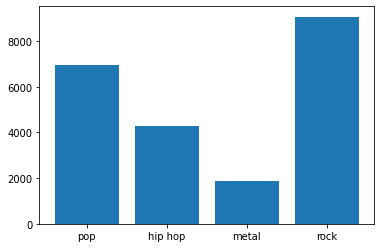

In [ ]:
plts.bar(lables,counts)

In [ ]:
from pyspark.sql.dataframe import DataFrame

In [ ]:
def foo(df)-> DataFrame:
  df.show()
  print(type(df))

In [ ]:
foo(listening_df)

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For